In [1]:
# Importing critical Python libraries to begin with

import pandas as pd  
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# 1.  Data Operations for Main Spotify-YouTube DataFrame

In [2]:
main_sy_df = pd.read_csv("Spotify_Youtube.csv", delimiter=',') #Our Main Spotify_YouTube DataFrame

# 1.1 Data Preprocessing

In [3]:
# Checking the dimensions of the initial DataFrame

print(f"* Number of rows and columns that DataFrames initially have are respectively {main_sy_df.shape}.", '\n\n')  

print(main_sy_df.info())

* Number of rows and columns that DataFrames initially have are respectively (20718, 28). 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64

# 1.2 Data Inspection and Handling for the Main DataFrame

In [4]:
# Checking any duplicated records

print(f'Number of duplicated rows across all columns applicable at the outset is: {main_sy_df.duplicated().sum()}', '\n')  

print('Number of NaNs per column as raw as the dataset can be is: ','\n')
print(main_sy_df.isna().sum(), '\n')

Number of duplicated rows across all columns applicable at the outset is: 0 

Number of NaNs per column as raw as the dataset can be is:  

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64 



In [5]:
# Checking if certain null values on YouTube aspects of the DataFrame are the same. 
## It will assist us with collectively removing NaNs in a healthy fashion

sub_main_sy_df1 = main_sy_df[['Artist', 'Url_youtube',
                              'Licensed', 'official_video']][main_sy_df['Url_youtube'].isnull() == True]
                             
sub_main_sy_df1 = sub_main_sy_df1['Artist'].unique().tolist()
sub_main_sy_df1.sort()

sub_main_sy_df2 = main_sy_df[['Artist', 'Title', 
                              'Licensed', 'official_video']][main_sy_df['Title'].isnull() == True]
                             
sub_main_sy_df2 = sub_main_sy_df2['Artist'].unique().tolist()
sub_main_sy_df2.sort()
                        
differing_artists = set(sub_main_sy_df1) ^ set(sub_main_sy_df2)
differing_artists_list = list(differing_artists)


# Identifying whether there are any differing artists between the two lists.

print("Differing artists:", differing_artists_list)


Differing artists: []


In [6]:
# Seeing that all NaN values between Url_Youtube and Title parameters belong to the same records, 
## we will be removing those with a peace of mind as below:


In [7]:
# Dropping a number of columns not required at any stage of our analysis

main_sy_df = main_sy_df.drop(['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube',
                              'Description'], axis=1).reset_index(drop=True)

In [8]:
print(main_sy_df.isna().sum())

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64


# 2. Data Operations for the Spotify Aspect of the Main DataFrame

# 2.1 Data Preprocessing for a Spotify DataFrame

In [9]:
# Preparing a Spotify DataFrame

spotify_columns = ['Artist', 'Track', 'Duration_ms', 'Album', 'Album_type', 'Stream',
                    'Danceability', 'Energy', 'Key', 'Loudness',
                  'Speechiness', 'Acousticness', 'Instrumentalness',
                  'Liveness', 'Valence', 'Tempo']


spotify_df = main_sy_df[spotify_columns] # Creating our Spotify DataFrame with relevant columns


In [10]:
spotify_df.loc[:,'Duration in Seconds'] = (spotify_df.loc[:,['Duration_ms']] / 1000).round() #Converting each song duration into seconds from miliseconds.

spotify_df.loc[:,'Stream'] = (spotify_df.loc[:,'Stream'] / 1e9).round(2) #Converting billions into two-digit figures


/var/folders/l9/k4g1l0yd3b9952lfcyrm9wzw0000gn/T/ipykernel_51863/1078921959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df.loc[:,'Duration in Seconds'] = (spotify_df.loc[:,['Duration_ms']] / 1000).round() #Converting each song duration into seconds from miliseconds.


In [11]:
spotify_df = spotify_df.drop(['Duration_ms'], axis=1).reset_index(drop=True)

# 2.2 Spotify EDA Analysis

# 2.2.1 Who Are the Top 20 Artists up to Date on Spotify in Terms of Stream Popularity?

In [12]:
# Counting total number of times an each artist is listened to via respective songs

top_20_spotify_artists_df = spotify_df.groupby(['Artist']).agg(stream_count=('Stream','sum')).sort_values(
    by='stream_count', ascending=False).reset_index().head(20)

top_20_spotify_artists_df.loc[:,'Stream Count in Billions'] = top_20_spotify_artists_df.loc[:,'stream_count']

# Resetting and adjusting the index for a more accurate data visualisation

top_20_spotify_artists_df = top_20_spotify_artists_df.drop(['stream_count'], axis=1).reset_index(drop=True)
top_20_spotify_artists_df.index = range(1, len(top_20_spotify_artists_df) + 1)


# Printing our response

top_20_spotify_artists_df 

,Artist,Stream Count in Billions
1,Post Malone,15.25
2,Ed Sheeran,14.38
3,Dua Lipa,13.41
4,XXXTENTACION,13.21
5,The Weeknd,13.04
6,Justin Bieber,12.11
7,Imagine Dragons,11.84
8,Coldplay,11.79
9,Khalid,11.37
10,Bruno Mars,10.89


# 2.2.2 What are the Top 50 Songs/Tracks up to Date Listened on Spotify?

In [13]:
# Meaning total number of times each track is listened to and grouping the data by Track and Duration.
## Please note that we are taking into account the average mean for tracks as there are some tracks that are sung by multiple artists, leading to duplicate 'Stream' figures.

top_50_spotify_songs_df = spotify_df.groupby(['Track', 
                                              'Duration in Seconds']).agg(mean_stream=('Stream','mean')).sort_values(
    by='mean_stream', ascending=False).reset_index().head(50) 

top_50_spotify_songs_df.loc[:,'Stream Count in Billions'] = top_50_spotify_songs_df.loc[:,'mean_stream']


# Resetting and adjusting the index for a more accurate data visualisation

top_50_spotify_songs_df = top_50_spotify_songs_df.drop(['mean_stream'], axis=1).reset_index(drop=True)
top_50_spotify_songs_df.index = range(1, len(top_50_spotify_songs_df) + 1)


# Printing our response

top_50_spotify_songs_df

,Track,Duration in Seconds,Stream Count in Billions
1,Blinding Lights,200.0,3.39
2,Shape of You,234.0,3.36
3,Someone You Loved,182.0,2.63
4,rockstar (feat. 21 Savage),218.0,2.59
5,Sunflower - Spider-Man: Into the Spider-Verse,158.0,2.54
6,One Dance,174.0,2.52
7,Closer,245.0,2.46
8,STAY (with Justin Bieber),142.0,2.37
9,Believer,204.0,2.37
10,Señorita,191.0,2.34


# 2.2.3 Who Single-Handedly or Dual Sing the Top 50 Songs/Tracks on Spotify?

In [14]:
# First of all, please note that seeing that there are duets, we wanted to separate Top 50 Songs from Top 20 Artists.

## Merging our Top 50 lists with our initial Spotify DataFrame to fetch the corresponding artist names via stream count of tracks.

top_50_spotify_songs_w_artist_names_df = top_50_spotify_songs_df.merge(
    spotify_df[['Artist','Stream']], 
    left_on='Stream Count in Billions',   
    right_on='Stream',
    how='inner')


# Dropping the redundant merging column

top_50_spotify_songs_w_artist_names_df = top_50_spotify_songs_w_artist_names_df.drop(['Stream'], axis=1).reset_index(drop=True)


# Other Data Handling Operations for a Better Data Visualisation

top_50_spotify_songs_w_artist_names_df = top_50_spotify_songs_w_artist_names_df.sort_values(by=[
    'Stream Count in Billions','Track', 'Artist'], ascending=False)

readjusted_column_order = ['Artist', 'Track', 'Stream Count in Billions', 'Duration in Seconds']
top_50_spotify_songs_w_artist_names_df = top_50_spotify_songs_w_artist_names_df[readjusted_column_order]

top_50_spotify_songs_w_artist_names_df.index = range(1, len(top_50_spotify_songs_w_artist_names_df) + 1)


# Printing our response - only the first 60 rows out of 89 in total

top_50_spotify_songs_w_artist_names_df.head(60)

,Artist,Track,Stream Count in Billions,Duration in Seconds
1,The Weeknd,Blinding Lights,3.39,200.0
2,Ed Sheeran,Shape of You,3.36,234.0
3,Lewis Capaldi,Someone You Loved,2.63,182.0
4,Post Malone,rockstar (feat. 21 Savage),2.59,218.0
5,Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,2.54,158.0
6,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,2.54,158.0
7,Drake,One Dance,2.52,174.0
8,The Chainsmokers,Closer,2.46,245.0
9,Halsey,Closer,2.46,245.0
10,The Kid LAROI,STAY (with Justin Bieber),2.37,142.0


# 2.2.4 What Percentage of Top 50 Songs are Contributed by Top 20 Artists on Spotify?

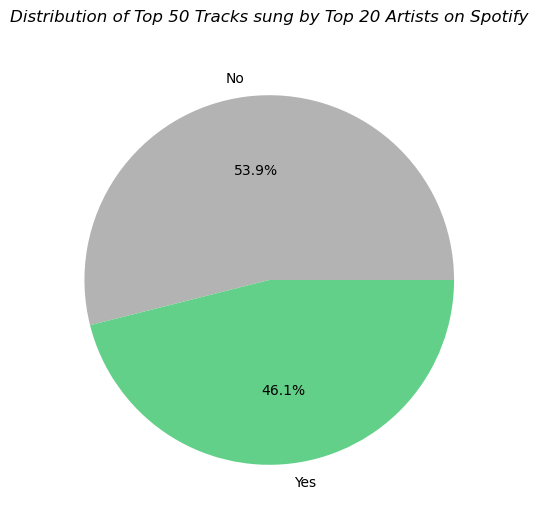

In [15]:
# Please note that as a track can be sung by many artists, we have to take into account all artists.

## Identifying each artist as to whether they are in the Top 20 and counting the Yes-No Distribution

top_50_spotify_songs_w_artist_names_df['Produced by Top 20 Artists?'] = top_50_spotify_songs_w_artist_names_df[
    'Artist'].isin(top_20_spotify_artists_df['Artist']).map({True: 'Yes', False: 'No'})

counts = top_50_spotify_songs_w_artist_names_df['Produced by Top 20 Artists?'].value_counts()


# Plotting a pie chart for visualising the data distribution

fig, ax = plt.subplots(figsize=(6, 6))

labels = ['No','Yes'] 
colors = ['#B3B3B3', '#62d089'] #Leveraging Spotify's Colour Palette to achieve an elegant and more importantly coherent outlook


ax.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors)

plt.title('Distribution of Top 50 Tracks sung by Top 20 Artists on Spotify', fontstyle='italic', pad=20)

plt.show()

# 2.2.5 If Exists, How Strong is the Correlation between Popular (Top 50) Tracks and Track Duration?

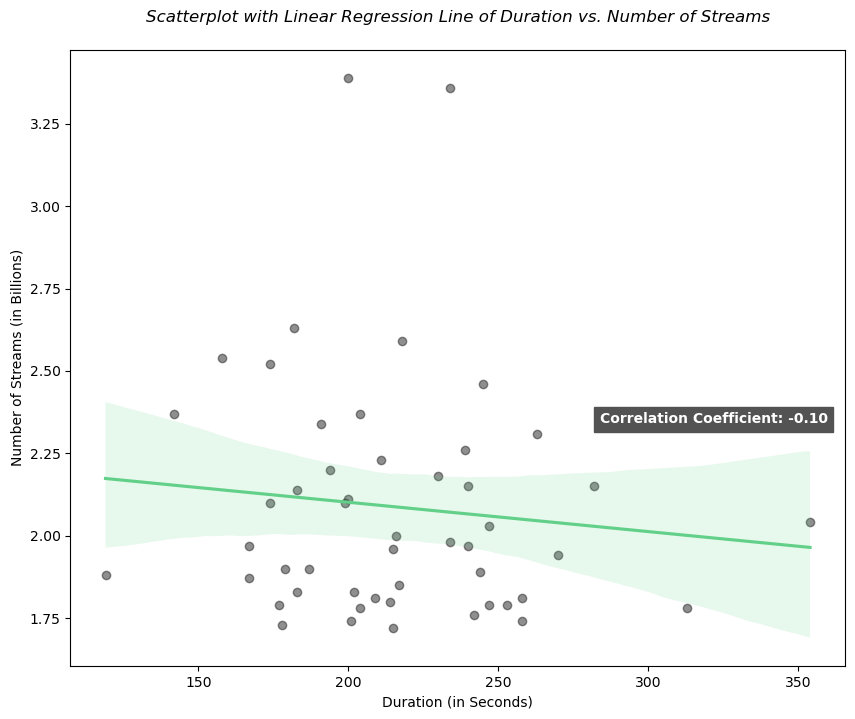

In [16]:
# Creating a scatterplot with regression line to visualise the correlation

plt.figure(figsize=(10, 8))
sns.regplot(data=top_50_spotify_songs_df, x='Duration in Seconds', y='Stream Count in Billions', scatter_kws=
            {'alpha':0.5, 'color': '#212121'}, line_kws={'color': '#62d089'}) #Please note that in order to avoid duplicate track record, we are simply resorting to the simplifed Top 50 Tracks DataFrame


# Calculate correlation coefficient to determine the strength of a potential correlation

correlation_coefficient = top_50_spotify_songs_df['Duration in Seconds'].corr(
    top_50_spotify_songs_df['Stream Count in Billions'])


# Other visualisation details of our Scatterplot

plt.xlabel('Duration (in Seconds)')
plt.ylabel('Number of Streams (in Billions)')
plt.title('Scatterplot with Linear Regression Line of Duration vs. Number of Streams', fontstyle='italic', pad=20)

plt.text(0.83, 0.4, f'Correlation Coefficient: {correlation_coefficient:.2f}', 
         ha='center', va='center', color='white', weight='bold', backgroundcolor='#535353', transform=plt.gca().transAxes)

plt.show()

# 2.2.6 Which Track Measures Have Meaningfully-Strong Positive/Negative Correlation Among Themselves?

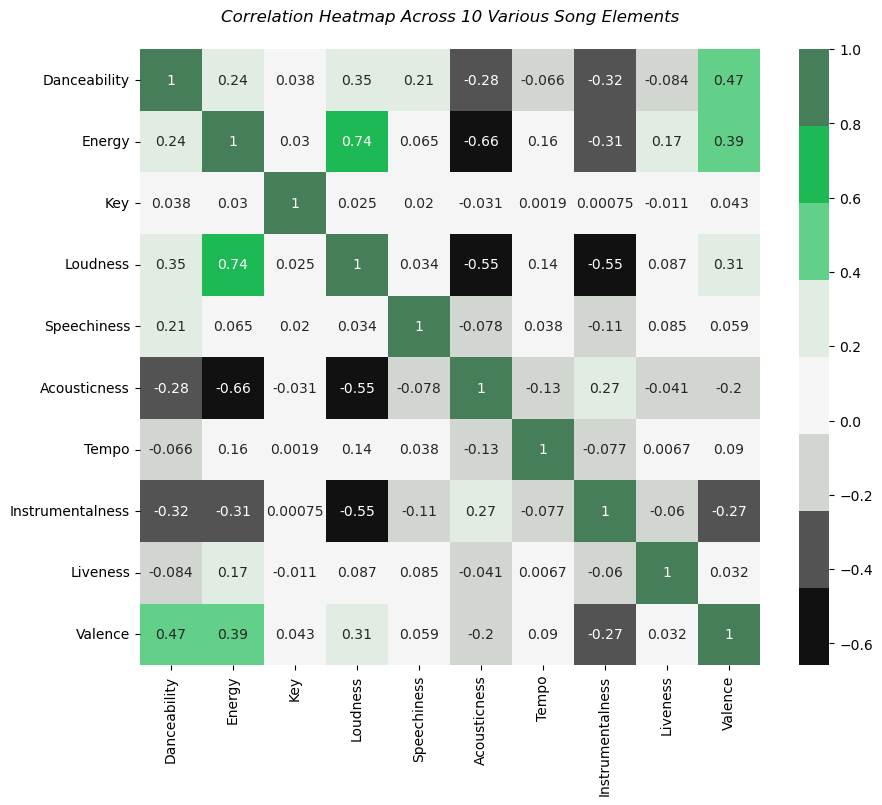

In [17]:
# Please note we resort to our Main Spotify DataFrame for this analysis which ensures full data integrity, 
## taking into account all tracks.

## Below dropping all tracks that have any NaN values across any of the 10 elements, 

## Turns out that only the following two tracks have NaN values:

### 11890       Natasha Bedingfield
### 13843    White Noise for Babies

rows_with_na = main_sy_df[['Danceability', 'Energy', 'Key', 'Loudness', 
                           'Speechiness', 'Acousticness', 'Tempo', 'Instrumentalness',
                           'Liveness', 'Valence']].isna().any(axis=1)


corr_spotify_df = main_sy_df[~rows_with_na]


# Preparing our Spotify Correlation Matrix

corr_spotify = corr_spotify_df[['Danceability', 'Energy', 'Key', 'Loudness', 
                                   'Speechiness', 'Acousticness', 'Tempo', 'Instrumentalness',
                                   'Liveness', 'Valence']]

corr_spotify_matrix = corr_spotify.corr()



# Plotting our Correlation Heatmap using our customised color palette

## We have created our customised Spotify-themed heatmap colors
spotify_target_colors = ["#111111", "#535353", "#D1D7D0", "#F5F5F5", "#E1ECE3", "#62D089", "#1DB954", "#457E59"]

## * Darker Green means Stronger Positive Correlation
## * Darker Black means Stronger Negative Correlation

plt.figure(figsize=(10, 8))
sns.heatmap(corr_spotify_matrix, annot=True, cmap=spotify_target_colors)

plt.title("Correlation Heatmap Across 10 Various Song Elements", fontstyle='italic', pad=20)
plt.show()

# 2.2.7.1 How does the Data Distribution look among All Tracks across Critical Track Elements?

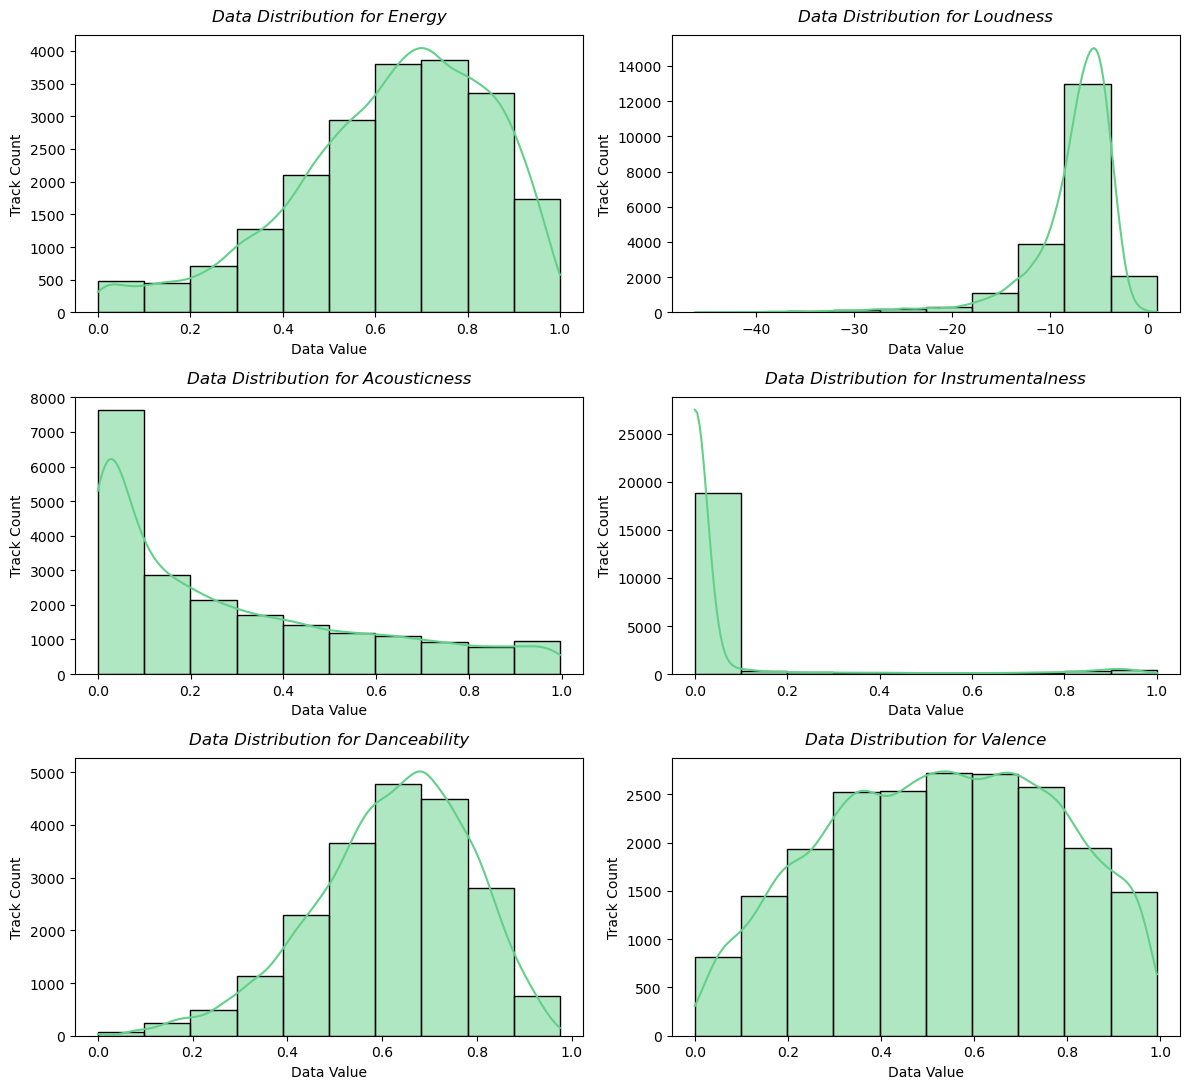

In [18]:
# Based on the analysis above, we have identified that the following have a meaningful positive/negative 
## correlation among themselves:

## 1) Energy: "is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."
## 2) Loudness: "the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db."
## 3) Acousticness: "a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."
## 4) Instrumentalness: "predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."
## 5) Danceability: "describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."
## 6) Valence: "a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

hist_corr_columns = ['Energy', 'Loudness', 'Acousticness', 'Instrumentalness', 'Danceability', 'Valence']


# Visualising the data distribution across all 6 elements:

fig, axs = plt.subplots(3, 2, figsize=(12, 11))
axs = axs.flatten()

for i, column in enumerate(hist_corr_columns):

    sns.histplot(spotify_df[column], bins=10, color='#62D089', edgecolor='black', ax=axs[i], kde=True)
   
    axs[i].set_xlabel('Data Value')
    axs[i].set_ylabel('Track Count')
    axs[i].set_title(f'Data Distribution for {column}', fontstyle='italic', pad=10)
    

plt.tight_layout()
plt.show()

# 2.2.7.2 How does the Data Distribution look among Only the Top 50 Songs across Critical Track Elements Identified Previously?

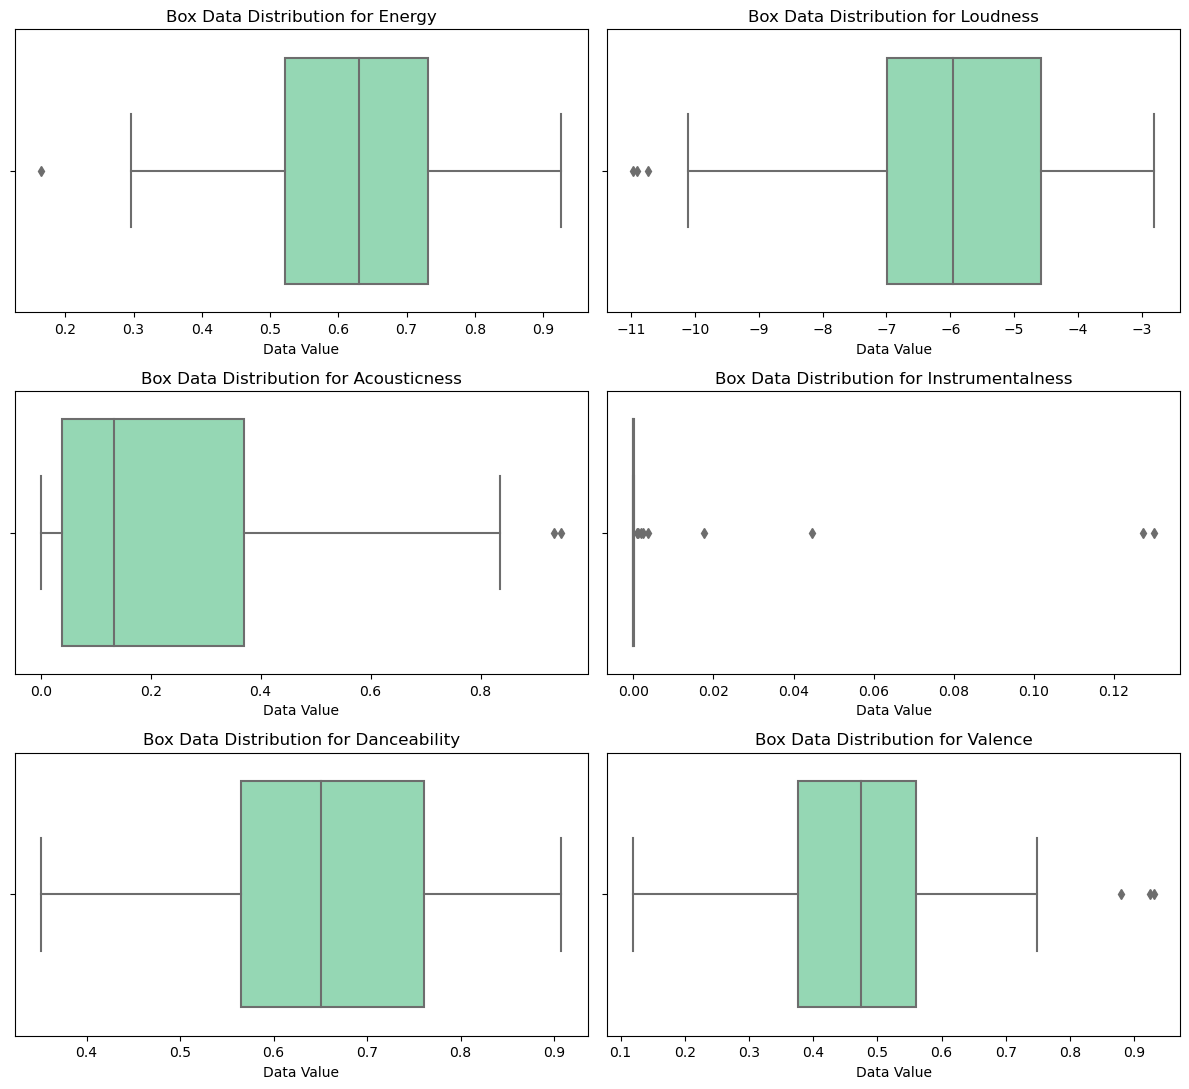

In [19]:
# First, we form a new DataFrame that only includes numeric information across the 6 critical song elements above

## We are also calculating the mean for each track to prevent duplicate tracks from polluting the existing data

correlated_track_elements_spotify_df = spotify_df.groupby('Track')[['Energy', 'Loudness', 
                                                                   'Acousticness', 'Instrumentalness', 
                                                            'Danceability', 'Valence']].mean().reset_index()


# Second, we are only taking into account this numeric data for our Top 50 Spotify Songs

top_50_correlated_track_elements_spotify_df = correlated_track_elements_spotify_df[correlated_track_elements_spotify_df['Track'].isin(top_50_spotify_songs_df['Track'])]


## Other subsequent data editing operations

top_50_correlated_track_elements_spotify_df = top_50_correlated_track_elements_spotify_df.sort_values(by='Track', ascending=True) #Sorting the new DataFrame involved
top_50_correlated_track_elements_spotify_df = top_50_correlated_track_elements_spotify_df .drop(columns=['Track'])
top_50_correlated_track_elements_spotify_df.index = range(1, len(top_50_correlated_track_elements_spotify_df ) + 1) #Editing the index


# Third, we are concatenating the Top 50 songs and their respective critical track element data

correlated_track_elements_w_top_50_spotify_songs_df = pd.concat([top_50_spotify_songs_df, 
                                                           top_50_correlated_track_elements_spotify_df], axis=1)



# Finally, we are visualising the data distribution across these Top Songs among the critical track elements

elements = ['Energy', 'Loudness', 'Acousticness', 'Instrumentalness', 'Danceability', 'Valence']

fig, axs = plt.subplots(3, 2, figsize=(12, 11))
axs = axs.flatten()


for i, element in enumerate(elements):
    
    sns.boxplot(data=correlated_track_elements_w_top_50_spotify_songs_df, x=element, color='#8AE2B3', ax=axs[i]) #Lighter version of the color #62D089:
    axs[i].set_xlabel('Data Value')
    axs[i].set_ylabel('')
    axs[i].set_title(f'Box Data Distribution for {element}')
    
    
plt.tight_layout()
plt.show()

# 2.2.8 What is the Data Count Highlighting Each Critical Element for Only Top 50 Songs?

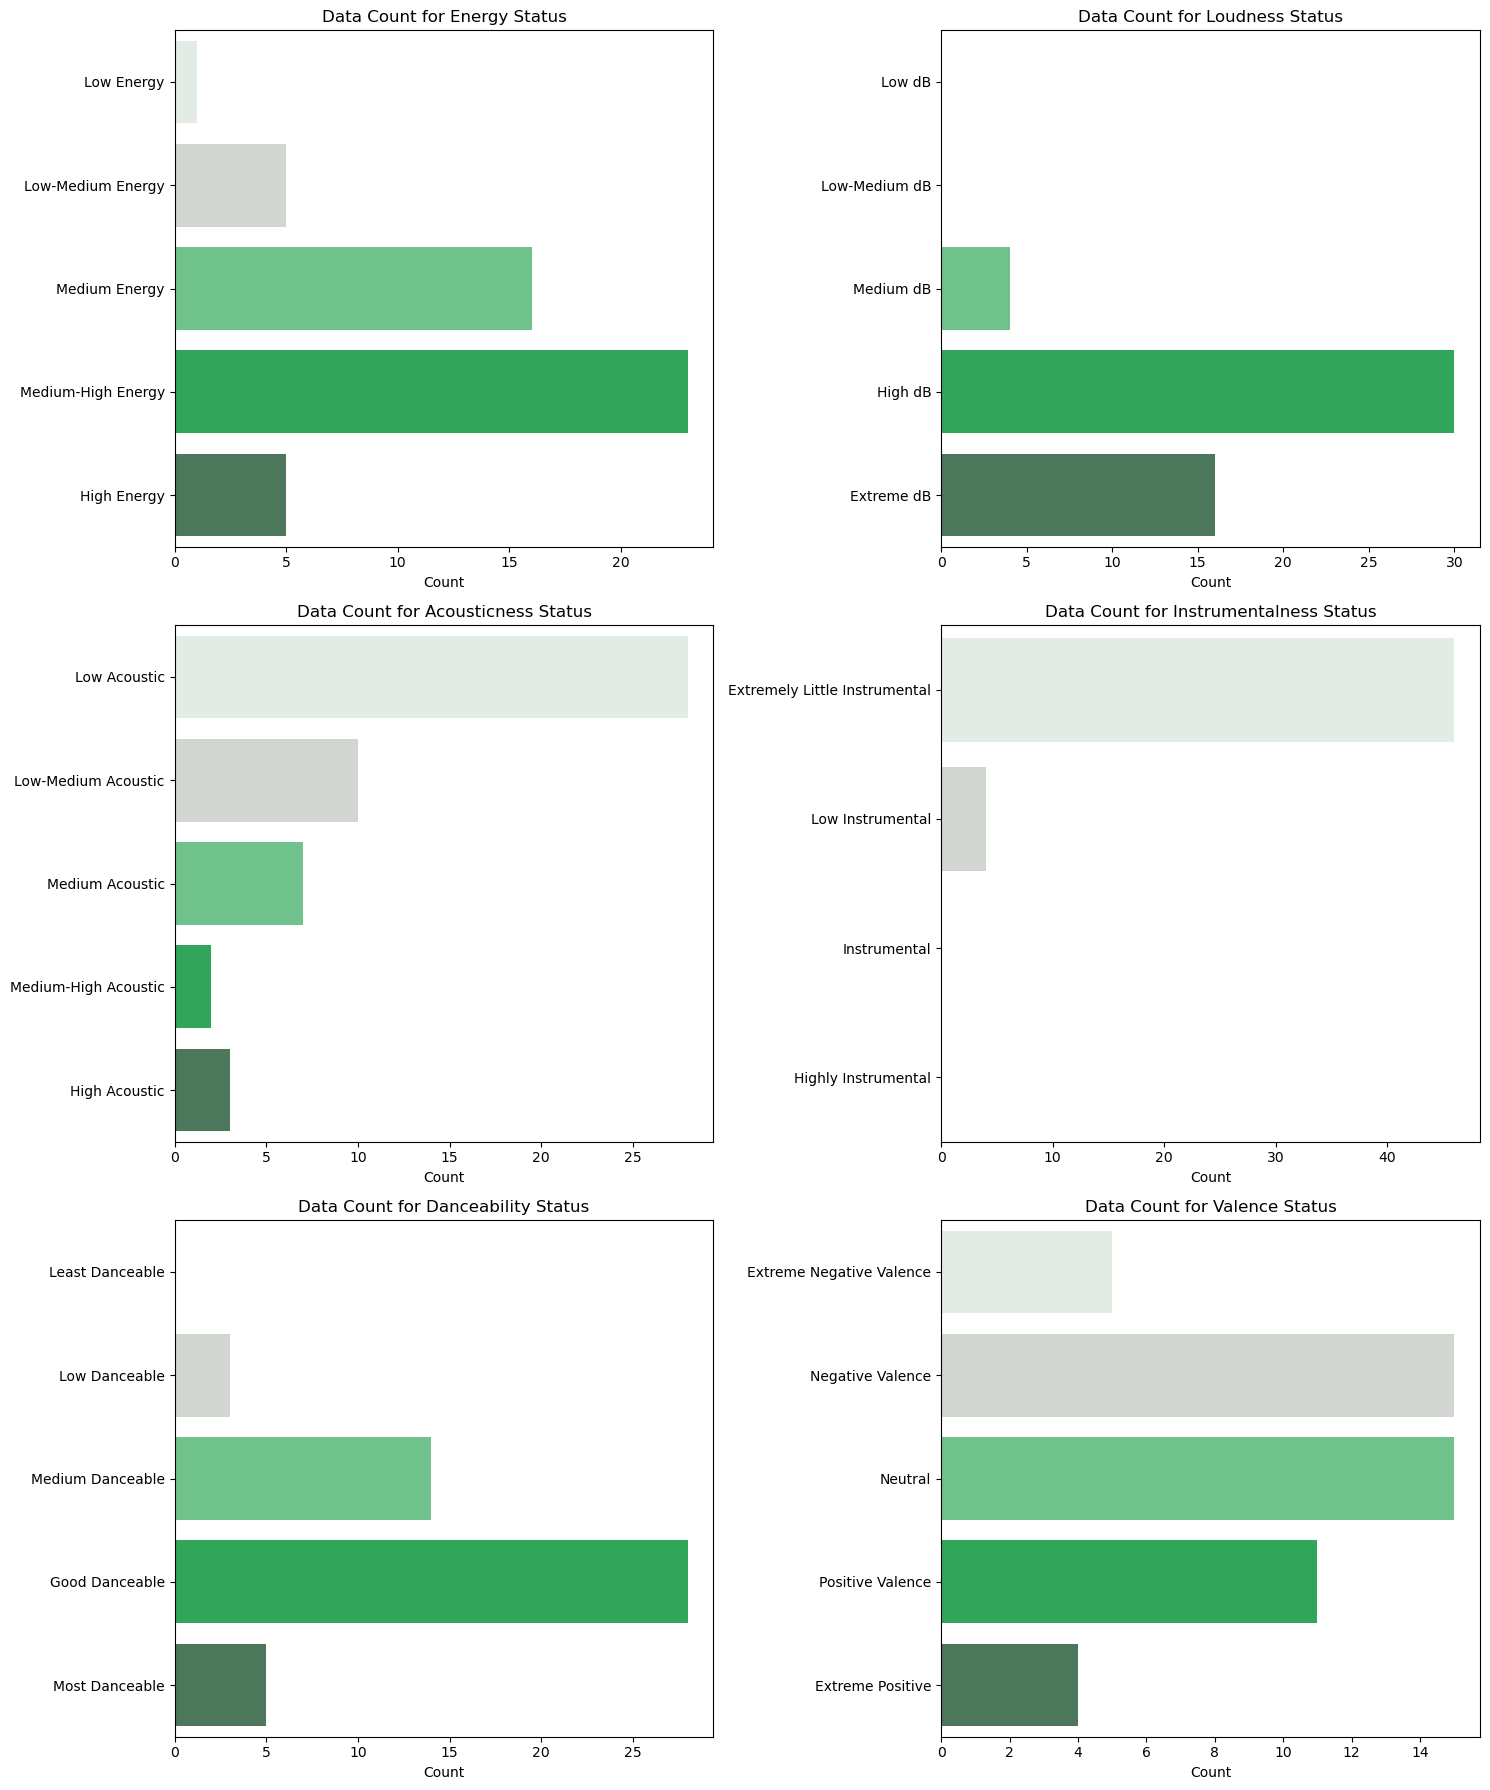

In [20]:
# Categorising each critical element for data classification in order to calculate the count per each.

energy_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
energy_labels = ['Low Energy', 'Low-Medium Energy', 'Medium Energy', 'Medium-High Energy', 'High Energy']
top_50_correlated_track_elements_spotify_df['Energy Status'] = pd.cut(top_50_correlated_track_elements_spotify_df['Energy'],
                                                                      bins=energy_bins, labels=energy_labels)

loudness_bins = [-60, -40, -20, -10, -5, 0]
loudness_labels = ['Low dB', 'Low-Medium dB', 'Medium dB', 'High dB', 'Extreme dB']
top_50_correlated_track_elements_spotify_df['Loudness Status'] = pd.cut(top_50_correlated_track_elements_spotify_df['Loudness'],
                                                                        bins=loudness_bins, labels=loudness_labels)

acousticness_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
acousticness_labels = ['Low Acoustic', 'Low-Medium Acoustic', 'Medium Acoustic', 
                       'Medium-High Acoustic', 'High Acoustic']
top_50_correlated_track_elements_spotify_df['Acousticness Status'] = pd.cut(top_50_correlated_track_elements_spotify_df['Acousticness'], 
                                                                            bins=acousticness_bins, labels=acousticness_labels)

instrumentalness_bins = [0, 0.01, 0.49, 0.79, 1]
instrumentalness_labels = ['Extremely Little Instrumental', 'Low Instrumental', 'Instrumental', 'Highly Instrumental']

top_50_correlated_track_elements_spotify_df['Instrumentalness Status'] = pd.cut(top_50_correlated_track_elements_spotify_df['Instrumentalness'], 
                                                                                bins=instrumentalness_bins, labels=instrumentalness_labels)
top_50_correlated_track_elements_spotify_df['Instrumentalness Status'] = top_50_correlated_track_elements_spotify_df['Instrumentalness Status'].fillna('Extremely Little Instrumental') #Due to extremely numerically small numbers, we are taking this precaution


danceability_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
danceability_labels = ['Least Danceable', 'Low Danceable', 'Medium Danceable', 'Good Danceable', 'Most Danceable']
top_50_correlated_track_elements_spotify_df['Danceability Status'] = pd.cut(top_50_correlated_track_elements_spotify_df['Danceability'], bins=danceability_bins, labels=danceability_labels)


valence_bins = [0, 0.24, 0.44, 0.54, 0.74, 1]
valence_labels = ['Extreme Negative Valence', 'Negative Valence', 'Neutral', 'Positive Valence', 'Extreme Positive']
top_50_correlated_track_elements_spotify_df['Valence Status'] = pd.cut(top_50_correlated_track_elements_spotify_df['Valence'], bins=valence_bins, labels=valence_labels)



# Plotting 6 different countplots to highlight the count for each critical track element among Top 50 Songs:

spotify_target_colors = ["#E1ECE3", "#D1D7D0", "#62D089", "#1DB954", "#457E59"]

elements = ['Energy Status', 'Loudness Status', 'Acousticness Status', 
            'Instrumentalness Status', 'Danceability Status', 'Valence Status']

fig, axs = plt.subplots(3, 2, figsize=(15, 18))
axs = axs.flatten()

for i, element in enumerate(elements):

    sns.countplot(data=top_50_correlated_track_elements_spotify_df, y=element, palette=spotify_target_colors , ax=axs[i])
    axs[i].set_xlabel('Count')
    axs[i].set_ylabel('')
    axs[i].set_title(f'Data Count for {element}')

plt.tight_layout()
plt.show()

# 3. Data Operations for a Potential Relationship Between Spotify and YouTube

# 3.1 Data Preprocessing for a YouTube DataFrame

In [21]:
# Preparing the YouTube DataFrame

youtube_columns = ['Artist', 'Track', 'Title', 'Channel', 'Views',
                   'Likes', 'Comments', 'Licensed', 'official_video']

youtube_df = main_sy_df[youtube_columns]


In [22]:
# Converting critical KPIs into more readable versions, representing them in billions, such as 

## Number of Views
## Number of Likes
## Number of Comments

youtube_df.loc[:,'Views in Billions'] = (youtube_df.loc[:,'Views'] / 1000000000).round(2)
youtube_df.loc[:,'Likes in Millions'] = (youtube_df.loc[:,'Likes'] / 1000000).round(2)
youtube_df.loc[:,'Comments in Millions'] = (youtube_df.loc[:,'Comments'] / 1000000).round(2)

youtube_df.drop(columns=['Views', 'Likes', 'Comments'], inplace=True)

/var/folders/l9/k4g1l0yd3b9952lfcyrm9wzw0000gn/T/ipykernel_51863/2159373184.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_df.loc[:,'Views in Billions'] = (youtube_df.loc[:,'Views'] / 1000000000).round(2)
/var/folders/l9/k4g1l0yd3b9952lfcyrm9wzw0000gn/T/ipykernel_51863/2159373184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_df.loc[:,'Likes in Millions'] = (youtube_df.loc[:,'Likes'] / 1000000).round(2)
/var/folders/l9/k4g1l0yd3b9952lfcyrm9wzw0000gn/T/ipykernel_51863/2159373184.py:

# 3.2 Spotify-YouTube EDA Relationship Analysis

# 3.2.1 Is There Any Strong Parallelism Between Spotify and YouTube Popularity? 

In [23]:
# Preparing each sub-YouTube DataFrames to begin investigating and gauging the relationship across numerous variables

## Views

youtube_top_50_views_df = youtube_df.groupby(['Track']).agg(Total_Views_in_Billions=('Views in Billions','sum')).sort_values(
    by='Total_Views_in_Billions', ascending=False).reset_index().head(50)

youtube_top_50_views_df = youtube_top_50_views_df.rename(columns={'Total_Views_in_Billions': 'Total Views in Billions'})


## Likes

youtube_top_50_likes_df = youtube_df.groupby(['Track']).agg(Total_Likes_in_Millions=('Likes in Millions','sum')).sort_values(
    by='Total_Likes_in_Millions', ascending=False).reset_index().head(50)

youtube_top_50_likes_df = youtube_top_50_likes_df.rename(columns={'Total_Likes_in_Millions': 'Total Likes in Millions'})


## Comments

youtube_top_50_comments_df = youtube_df.groupby(['Track']).agg(Total_Comments_in_Millions=('Comments in Millions','sum')).sort_values(
    by='Total_Comments_in_Millions', ascending=False).reset_index().head(50)

youtube_top_50_comments_df = youtube_top_50_comments_df.rename(columns={'Total_Comments_in_Millions': 'Total Comments in Millions'})

In [24]:
# Merging the YouTube Top 50 Views DataFrame with our earlier Top 50 Spotify Tracks for the investigation

youtube_top_50_views_df = youtube_top_50_views_df.merge(top_50_spotify_songs_df[['Track', 
                                                                           'Stream Count in Billions']], 
                                                                           on='Track', how='left')

# Other necessary data operations for the DataFrame at hand

youtube_top_50_views_df['Stream Count in Billions'].fillna('No', inplace=True)
youtube_top_50_views_df['Top 50 Spotify Track?'] = youtube_top_50_views_df['Stream Count in Billions'].map(
    lambda x: 'Yes' if x != 'No' else x)
youtube_top_50_views_df.drop(columns=['Stream Count in Billions'], inplace=True)

youtube_top_50_views_df.index = range(1, len(youtube_top_50_views_df) + 1) #Editing the index


In [25]:
# Merging the YouTube Top 50 Likes DataFrame with our earlier Top 50 Spotify Tracks for the investigation

youtube_top_50_likes_df = youtube_top_50_likes_df.merge(top_50_spotify_songs_df[['Track', 
                                                                           'Stream Count in Billions']], 
                                                                           on='Track', how='left')

# Other necessary data operations for the DataFrame at hand

youtube_top_50_likes_df['Stream Count in Billions'].fillna('No', inplace=True)
youtube_top_50_likes_df['Top 50 Spotify Track?'] = youtube_top_50_likes_df['Stream Count in Billions'].map(
    lambda x: 'Yes' if x != 'No' else x)
youtube_top_50_likes_df.drop(columns=['Stream Count in Billions'], inplace=True)

youtube_top_50_likes_df.index = range(1, len(youtube_top_50_likes_df) + 1) #Editing the index


In [26]:
# Merging the YouTube Top 50 Comments DataFrame with our earlier Top 50 Spotify Tracks for the investigation

youtube_top_50_comments_df = youtube_top_50_comments_df.merge(top_50_spotify_songs_df[['Track', 
                                                                           'Stream Count in Billions']], 
                                                                           on='Track', how='left')

# Other necessary data operations for the DataFrame at hand

youtube_top_50_comments_df['Stream Count in Billions'].fillna('No', inplace=True)
youtube_top_50_comments_df['Top 50 Spotify Track?'] = youtube_top_50_comments_df['Stream Count in Billions'].map(
    lambda x: 'Yes' if x != 'No' else x)
youtube_top_50_comments_df.drop(columns=['Stream Count in Billions'], inplace=True)

youtube_top_50_comments_df.index = range(1, len(youtube_top_50_comments_df) + 1) #Editing the index


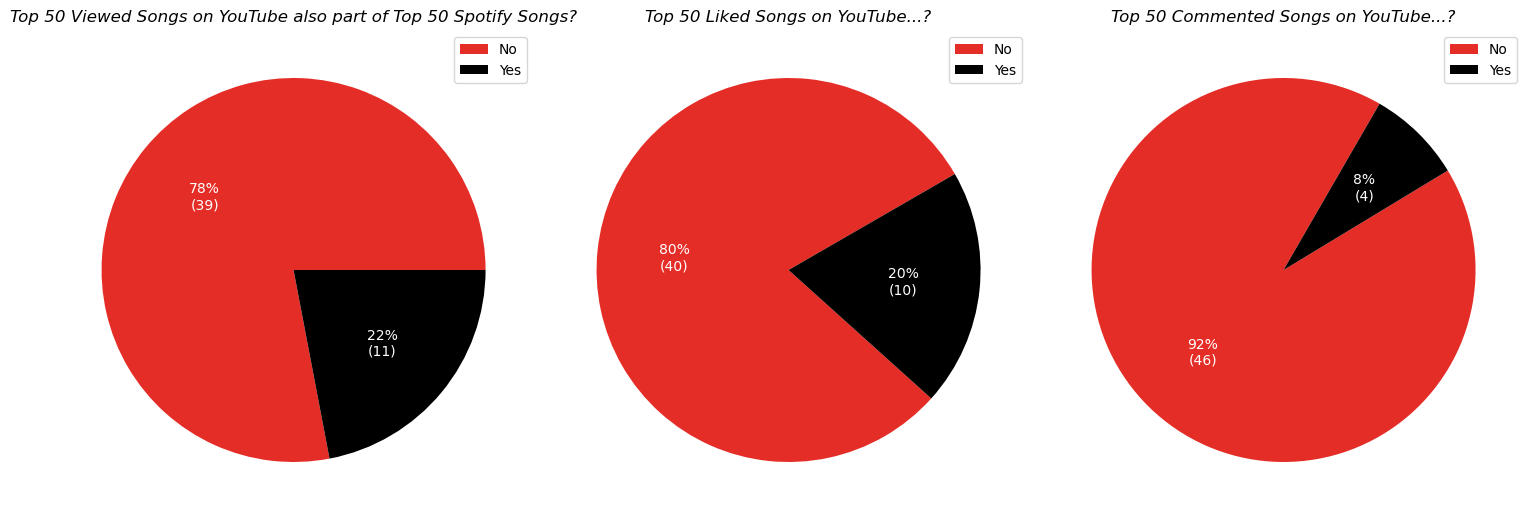

In [27]:
# Data visualisation tasks to see the data distribution between Spotify and YouTube Music popularity across 

## Top 50 Tracks from Spotify
## Top 50 Viewed Song Videos from YouTube
## Top 50 Liked Song Videos from YouTube
## Top 50 Most Commented Song Videos from YouTube

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
youtube_colors = ['#E52D27', '#000000']

views_counts = youtube_top_50_views_df['Top 50 Spotify Track?'].value_counts()
likes_counts = youtube_top_50_likes_df['Top 50 Spotify Track?'].value_counts()
comments_counts = youtube_top_50_comments_df['Top 50 Spotify Track?'].value_counts()


# We are resorting to a custom function to add percentage values 

def add_percentage_labels(pct, allvals):
    rounded_pct = round(pct)
    absolute = int(rounded_pct / 100. * np.sum(allvals))
    return "{:.0f}%\n({:d})".format(rounded_pct, absolute)


# Plotting all three pie charts

views_pie = axs[0].pie(views_counts, autopct=lambda pct: add_percentage_labels(pct, views_counts), colors=youtube_colors, startangle=0, textprops={'color': "white"})
axs[0].set_title('Top 50 Viewed Songs on YouTube also part of Top 50 Spotify Songs?', fontstyle='italic')
axs[0].legend(['No', 'Yes'], loc='best')

likes_pie = axs[1].pie(likes_counts, autopct=lambda pct: add_percentage_labels(pct, likes_counts), colors=youtube_colors, startangle=30, textprops={'color': "white"})
axs[1].set_title('Top 50 Liked Songs on YouTube...?', fontstyle='italic')
axs[1].legend(['No', 'Yes'], loc='best')

comments_pie = axs[2].pie(comments_counts, autopct=lambda pct: add_percentage_labels(pct, comments_counts), colors=youtube_colors, startangle=60, textprops={'color': "white"})
axs[2].set_title('Top 50 Commented Songs on YouTube...?', fontstyle='italic')
axs[2].legend(['No', 'Yes'], loc='best')

plt.tight_layout()
plt.show()